In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from minisom import MiniSom
import astropy
from astropy import units as u
from astropy.cosmology import WMAP5
from astropy import units as u
from astropy.cosmology import WMAP5 

In [44]:
df = pd.read_csv('RCSED/rcsed.csv')

In [45]:
id_col = ['objid','specobjid']
z_col = [  'exp_tau','exp_met','z', 'e_bv', 'ssp_age', 'ssp_met', 'specclass']

band_col = [
    'corrmag_fuv', 'corrmag_nuv', 'corrmag_u', 'corrmag_g', 'corrmag_r', 'corrmag_i', 
    'corrmag_z', 'corrmag_y', 'corrmag_j', 'corrmag_h', 'corrmag_k'
]

kcorr_col = [
     'kcorr_fuv','kcorr_nuv','kcorr_u','kcorr_g','kcorr_r','kcorr_i',
     'kcorr_z','kcorr_y','kcorr_j','kcorr_h','kcorr_k',
]

In [46]:
col = id_col + z_col + band_col + kcorr_col

In [47]:
data = df[col].dropna()

In [48]:
data[band_col].head()

,corrmag_fuv,corrmag_nuv,corrmag_u,corrmag_g,corrmag_r,corrmag_i,corrmag_z,corrmag_y,corrmag_j,corrmag_h,corrmag_k
18,20.430805,20.963827,19.483593,18.175556,17.582560,17.170374,16.867794,16.277828,16.224766,15.796741,15.897239
20,20.316390,19.689003,18.913360,17.633633,17.118832,16.801023,16.559082,16.183378,16.157516,16.061178,15.977037
25,20.786072,19.694458,18.216558,16.744936,15.942631,15.533159,15.280964,14.804124,14.598612,14.280346,14.365913
28,20.476007,19.936340,18.627714,17.455538,16.852865,16.501130,16.458048,15.947557,15.661368,15.418820,15.581812
29,19.992838,19.668417,18.950533,17.954803,17.538660,17.193727,17.054646,16.804903,16.682253,16.268763,16.288889


In [49]:
exp_tau = data['exp_tau'].values
exp_met = data['exp_met'].values
inputs = data[band_col]
inputs = np.array(inputs)

In [156]:
%%time
# Initialization and trainin
n_neurons = 60
m_neurons = 80
som = MiniSom(n_neurons, m_neurons, 11, neighborhood_function='gaussian',learning_rate=0.1,
             sigma = 7, random_seed=50
             )
som.pca_weights_init(inputs)
som.train(inputs, 100000, verbose=True)    

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.4793563077312262
CPU times: user 35 s, sys: 10.8 s, total: 45.8 s
Wall time: 1min 17s


In [157]:
X = []
Y = []
for xx in inputs:
    x,y = som.winner(xx)
    X.append(x)
    Y.append(y)

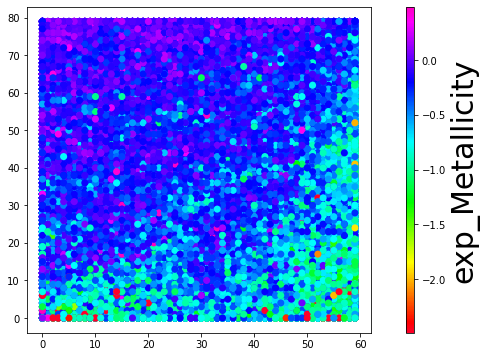

In [198]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c = exp_met, cmap=plt.cm.gist_rainbow, edgecolor='none', s=50)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label = 'Metallicity').set_label('exp_Metallicity', fontsize=30)
plt.savefig('met')
plt.show()

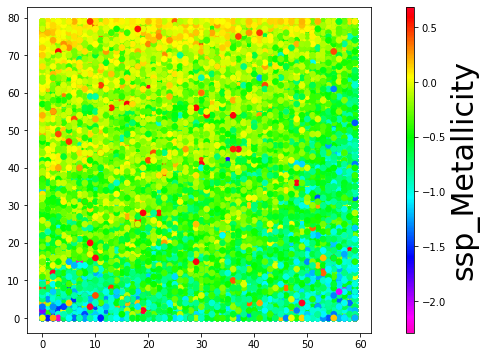

In [200]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c = data['ssp_met'], cmap=plt.cm.gist_rainbow_r, edgecolor='none', s=45)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical').set_label('ssp_Metallicity', fontsize=30)
plt.savefig('ssp_met_som')
plt.show()

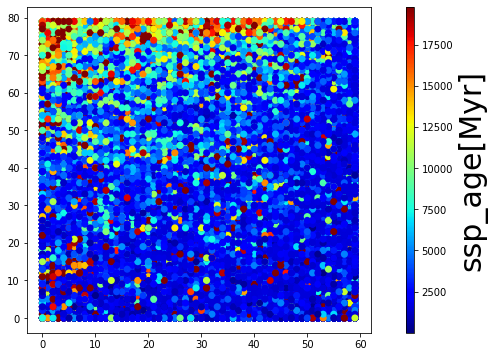

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c = data['ssp_age'], cmap=plt.cm.jet, edgecolor='none', s=50)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label='ssp_age[Myr]').set_label('ssp_age[Myr]', fontsize=30)
plt.savefig('ssp_age_som')
plt.show()

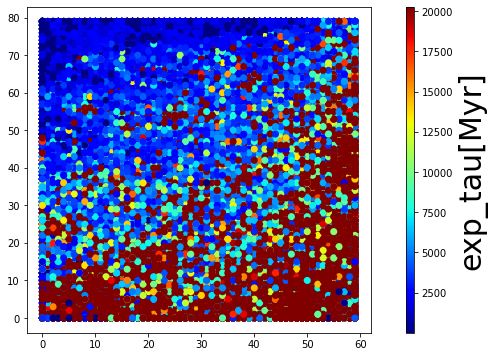

In [197]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c = data['exp_tau'], cmap=plt.cm.jet, edgecolor='none', s=50)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical').set_label('exp_tau[Myr]', fontsize=30)
plt.savefig('exp_age_som')
plt.show()

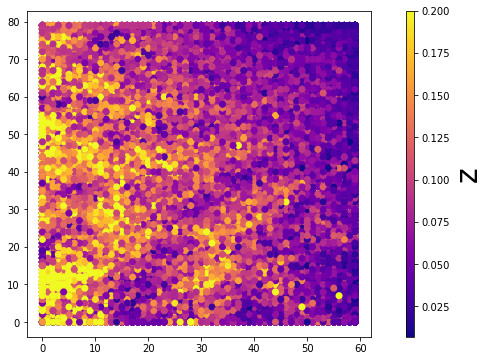

In [195]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c = data['z'], cmap=plt.cm.plasma, edgecolor='none', s=50,vmax=0.2 )
plt.colorbar(aspect=40, pad=0.08, orientation='vertical').set_label('z', fontsize=30)
plt.savefig('z')
plt.show()